<a href="https://colab.research.google.com/github/20241984/Ejercicios/blob/main/Ejercicio_Vino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier


In [13]:
# importar archivo de datos.
df = pd.read_csv('/content/sample_data/Wine_cultivars.csv')
df.head()


,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

La tarea es:

1) Utilizar un modelo de regresión logística e intentar tanto la regularización L1 como L2. Esta es una gran oportunidad para mostrar que afinar los hiperparámetros puede afectar los resultados del modelo.

2) Después de hacer eso, intenter usar los modelos de KNN y bosque aleatorio.

3) Aborden estas preguntas en una celda de texto al final de sus códigos:

¿Cuál es el modelo que mejor funciona?
¿Cuáles hiperparámetros afinaron para cada uno de los modelos? ¿Hay algún modelo que les gustó más y por qué?

In [15]:
# hay 3 clases de vino o etiquetas
df['Class label'].value_counts()


Class label
2    71
1    59
3    48
Name: count, dtype: int64

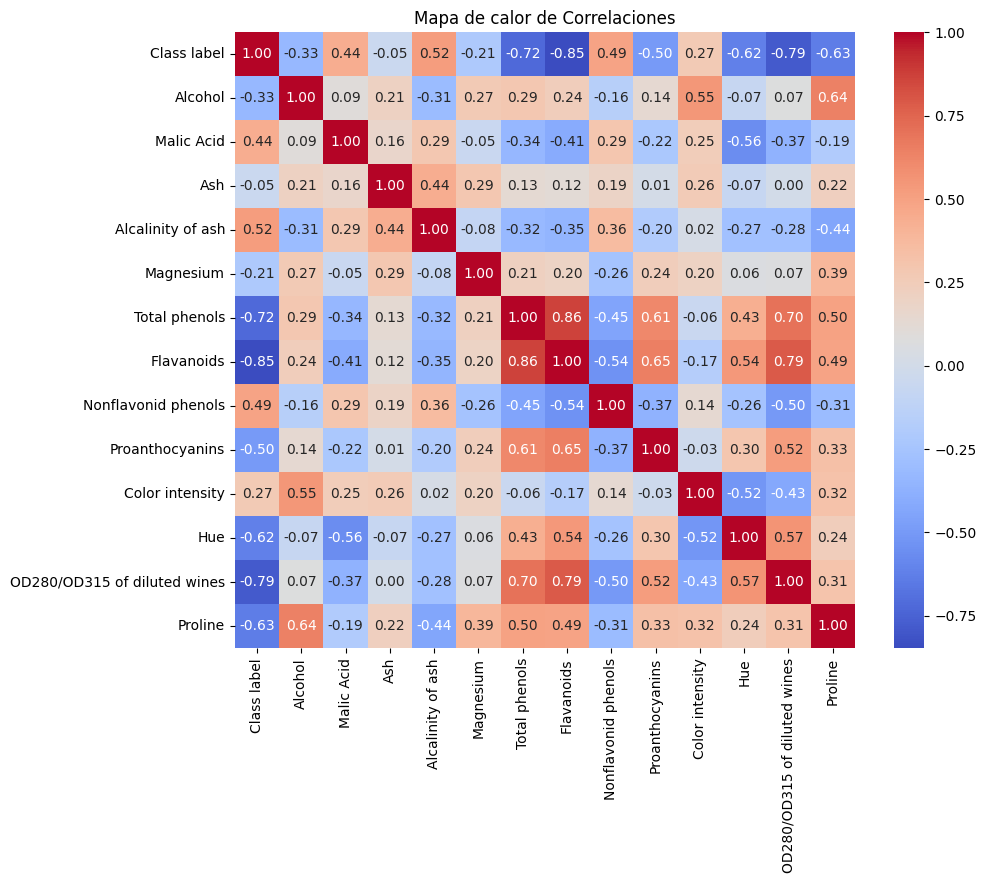

In [16]:
# Realicen un mapa de calor de las correlaciones.

correlation_matrix = df.corr()
plt.figure(figsize =(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f")
plt.title ('Mapa de calor de Correlaciones')
plt.show()

In [17]:
# Assign feature matrix and target vector
X = df.drop(columns=['Class label'])
y = df['Class label']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Make an instance of the model with default parameters
logreg = LogisticRegression()
# Instantiate Standard Scaler because scaling is required for logistic regression
scaler = StandardScaler()
# Put scaler and model in a pipeline
logreg_pipe = make_pipeline(scaler, logreg)
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y
logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

1.0
0.9777777777777777


{0.0001: 0.3333333333333333,
 0.001: 0.3333333333333333,
 0.01: 0.3333333333333333,
 0.1: 1.0,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

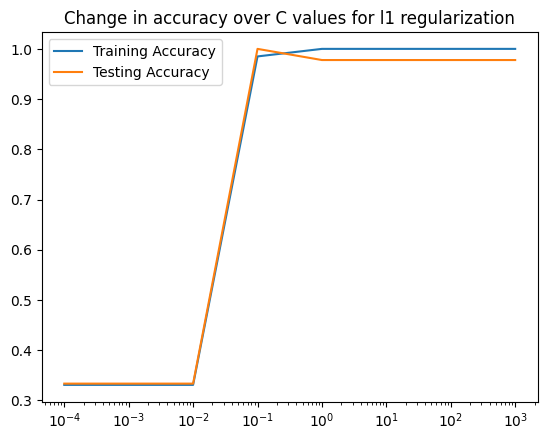

In [18]:
# Afinancion  L1
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:

  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)

  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()

#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.9111111111111111,
 0.001: 0.9333333333333333,
 0.01: 0.9555555555555556,
 0.1: 0.9777777777777777,
 1: 0.9777777777777777,
 10: 0.9777777777777777,
 100: 0.9777777777777777,
 1000: 0.9777777777777777}

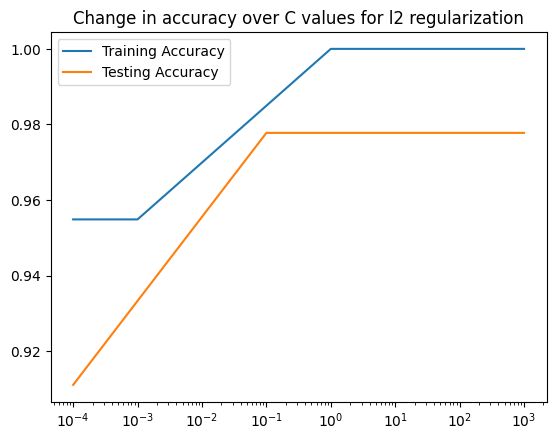

In [19]:
# Afinacion L2
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)

  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [26]:
# 2 Modelo KNN
from sklearn.neighbors import KNeighborsClassifier


In [32]:
# Iniciación del modelo KNN
knn= KNeighborsClassifier (n_neighbors=3)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(predictions.tolist())
print(y_test.tolist())
print('Accuracy:', knn.score(X_test, y_test))

[3, 1, 3, 1, 2, 1, 2, 3, 1, 1, 3, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 3, 2, 1, 2, 2, 3, 3]
[1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2, 3]
Accuracy: 0.7555555555555555


In [33]:
# 2 Bosque aleatorio
# importar el modelo que quieran usar y hacer una instancia del modelo
dec_tree = DecisionTreeClassifier(random_state = 42, max_depth=2)


In [34]:
# Miren a algunos hiperparámetros que parezcan ajustables
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [35]:
# EL modelo en esta etapa aprende con el FIT
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [36]:
#  predecir las etiquetas de los datos nuevos
dec_tree.predict(X_test)

array([1, 1, 3, 1, 1, 1, 2, 3, 2, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       2, 3, 3, 3, 2, 1, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 1, 3, 1, 2, 2, 2,
       3])

In [37]:
# calcula la exactitud de la clasificación
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)
print(train_score)
print(test_score)

0.9398496240601504
0.8666666666666667


3) Aborden estas preguntas en una celda de texto al final de sus códigos:

¿Cuál es el modelo que mejor funciona?
La Regresion Logistica tiene un alto % de accuracy.
 ¿Cuáles hiperparámetros afinaron para cada uno de los modelos?
 En la regresion logistica ajustando L1 y L2 se logra un 97% de accuracy en el modelo. en el KNN ajusta modelo n_neighbors=3 logrando 75% de accuracy, en Random forest ajustando max_deph=2 se logra un 86% de accuracy en los datos de prueba.
 ¿Hay algún modelo que les gustó más y por qué?
 La regresion logistica porque tiene un mayor grado de accuracy y se pueden ajustar los hiperparametros.
